In [0]:
import os
import csv
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

# FIRST PART

# Nouvelle section

In [2]:
# cll dataset
datafile = "/content/cll_dataset.csv"
# 0- read the file
cll = pd.read_csv(datafile)
cll.shape
# a row is a sample = a patient
# column 'Treat6m' recurrence of the disease, 1 if true, 0 if false
# other columns are features = rate of several types of cells and molecules in the patient
# -----------------------------------------------------------------------------------------

(31, 30)

In [0]:
# 1- create X the features, Y the predictions
X = cll.drop(['Treat6m'], axis = 'columns')
Y = cll['Treat6m']

In [4]:
# 2- create a function 'fit_rf' that fit random forests on xtrain, ytrain
# it should return the random forest score on the xtest, ytest set.
# use sklearn implementation
def fit_rf(xtrain, ytrain, xtest, ytest):
  clf = RandomForestClassifier(max_depth = 2, random_state = 0)
  clf.fit(xtrain, ytrain)
  return clf.score(xtest, ytest)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 123)
score = fit_rf(xtrain, ytrain, xtest, ytest)
print(score)

0.7142857142857143


In [5]:
# 3- create a function 'repeat_experiment' that will re-shuffle the dataset and fit a classifier a hundred times
# store the score at each iteration
# return the average score on the hundred iterations
def repeat_experiment(xtrain, ytrain, xtest, ytest):
  score = []
  for i in range(100):
    xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)
    result = fit_rf(xtrain, ytrain, xtest, ytest)
    score.append(result)
  return numpy.mean(score)
    
avg_score = repeat_experiment(xtrain, ytrain, xtest, ytest)
print(avg_score)

0.7385714285714287


In [6]:
# 4- Is it good ? (check score averaged over a hundred experiments)
if avg_score > score: 
  print('It is good !')
else :
  print('It is bad ...')

It is good !


In [7]:
# 5- Is it actually good ? try to predict only vectors with 'Treat6m' = 1
# You can compute per-class precision, recall, f-scores...
ytest_1 = ytest[ytest==1]
xtest_1 = xtest.loc[ytest[ytest==1].index]

clf = RandomForestClassifier(max_depth = 2, random_state = 0) # same model of the first time
clf.fit(xtrain, ytrain)

ypred_1 = clf.predict(xtest_1)
print('score :', clf.score(xtest_1, ytest_1))
print('Confusion matrix only for class 1 on the test :', confusion_matrix(ytest_1, ypred_1))
print('recall :', recall_score(ytest_1, ypred_1 ))
print('f1_score :', f1_score(ytest_1, ypred_1 ))

ypred = clf.predict(xtest)
print('Confusion matrix on the test :', confusion_matrix(ytest, ypred))

score : 0.0
Confusion matrix only for class 1 on the test : [[0 0]
 [1 0]]
recall : 0.0
f1_score : 0.0
Confusion matrix on the test : [[5 1]
 [1 0]]


It is actually bad because the patients with treatment are predict without treatment. No patients with treatment are well predict. Moreover one patient without treatment is predict with treatment.

In [8]:
# 6- Why is it actually pretty bad ?
# --just write an answer here--
# help: ratio of class 1 and class 0 in the dataset
prct_1_data = round(len(cll[cll['Treat6m']==1])/len(cll)*100, 0)
prct_1_train = round(len(ytrain[ytrain==1])/len(ytrain)*100, 0)
prct_1_test = round(len(ytest[ytest==1])/len(ytest)*100, 0)
print('In the dataset, we have ', prct_1_data, '% of class 1 in the dataset,', 
      prct_1_train, '% in the train, and', prct_1_test, '% in the dataset.')
print('However, we learn only on', len(xtrain), 'individus and so only', 
      len(ytrain[ytrain==1]), 'individus are of class 1.')

In the dataset, we have  23.0 % of class 1 in the dataset, 25.0 % in the train, and 14.0 % in the dataset.
However, we learn only on 24 individus and so only 6 individus are of class 1.


Indeed, we do not have enough patients and so patients of class 1 to predict well this class.

# SECOND PART

In [9]:
# Amazon has recorded some data from its job interviews.
# After compiling all the data,
# they came with a pair of features called "skills" and "human fit"
# that are supposed to be sufficient to predict whether a candidate is worth interviewing.

# 0- load the data
genderdatafile = "/content/gender_biased.csv"
gender = pd.read_csv(genderdatafile)
gender.shape

(2000, 5)

In [10]:
# 1- Which feature should not be taken into account to discriminate candidates ?
# we call this feature "sensitive"

gender.columns

Index(['Unnamed: 0', 'skills', 'human_fit', 'gender', 'selected'], dtype='object')

The feature gender should not be taken into account to discriminate candidates.

In [11]:
# 2- Fit classifiers of your choice on the given dataset (output is "selected" column)
# do not use the "sensitive" feature!!!
X = gender.drop(['Unnamed: 0', 'gender', 'selected'], axis = 'columns')
Y = gender['selected']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state = 123)

clf_gender = RandomForestClassifier(max_depth = 2, random_state = 0)
clf_gender.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [12]:
# 3- Evaluate the classifiers
ypred = clf_gender.predict(xtest)
print('score :', clf_gender.score(xtest, ytest))
print('Confusion matrix on the test :', confusion_matrix(ytest, ypred))
print('precision :', round(precision_score(ytest, ypred),2))
print('recall :', round(recall_score(ytest, ypred), 2))
print('f1_score :', round(f1_score(ytest, ypred), 2))

score : 0.86
Confusion matrix on the test : [[201  23]
 [ 33 143]]
precision : 0.86
recall : 0.81
f1_score : 0.84


In [13]:
# 4- What is the impact of automatic decision on the "protected group" (the one with sensitive=1)?
# modifier et regarder par rapport a la variable gender

# list of women/men
women = gender[gender['gender']==1].index
men = gender[gender['gender']==0].index

# list of wome/men in the test
women_test = list(set(xtest.index).intersection(women))
men_test = list(set(xtest.index).intersection(men))

# First, we check the prediction according to the gender
xtest_men = xtest.loc[men_test]
ytest_men = ytest.loc[men_test]
print('score for men (gender = 0) :', clf_gender.score(xtest_men, ytest_men))

xtest_women = xtest.loc[women_test]
ytest_women = ytest.loc[women_test]
print('score for women (gender = 1) :', clf_gender.score(xtest_women, ytest_women))

score for men (gender = 0) : 0.8899082568807339
score for women (gender = 1) : 0.8241758241758241


We predict men better than women.

In [14]:
# Second, we train the model with the gender and compare the performance
X_g = gender.drop(['Unnamed: 0','selected'], axis = 'columns')

xtrain_g, xtest_g, ytrain_g, ytest_g = train_test_split(X_g, Y, test_size = 0.2, random_state = 123)

clf_gender.fit(xtrain_g, ytrain_g)

ypred_g = clf_gender.predict(xtest_g)
print('score :', clf_gender.score(xtest_g, ytest_g))
print('Confusion matrix on the test :', confusion_matrix(ytest_g, ypred_g))

score : 0.85
Confusion matrix on the test : [[198  26]
 [ 34 142]]


The score is similar to the model without the gender. Then, the gender seems to not be an explanation for the selection.

In [15]:
# Third, we compare the prediction according to the gender
xtest_men = xtest_g.loc[men_test]
ytest_men = ytest_g.loc[men_test]
print('score for men (gender = 0) :', clf_gender.score(xtest_men, ytest_men))

xtest_women = xtest_g.loc[women_test]
ytest_women = ytest_g.loc[women_test]
print('score for women (gender = 1) :', clf_gender.score(xtest_women, ytest_women))

score for men (gender = 0) : 0.8853211009174312
score for women (gender = 1) : 0.8076923076923077


The prediction is slightly less good when the model knows the gender. (without gender : 0.82 / with gender : 0.80)

In [0]:
# 5- In sklearn, you can put a weight on samples
# Find a weighting strategy to compute a fair classification

# As women is under-represented and less good predicted, we give women a heavier weight
gender_weighted = gender
gender_weighted['weight'] = [1.5 if x == 1 else 1 for x in gender_weighted['gender']] 
# women have a weigth of 1.5 and men a weigth of 1.

In [17]:
# 6- Evaluate your classifier, check the trade-off between fairness and accuracy
clf_gender.fit(xtrain, ytrain, sample_weight = gender_weighted.loc[ytrain.index].weight)
ypred_weighted = clf_gender.predict(xtest)
print('score :', clf_gender.score(xtest, ytest))
print('Confusion matrix on the test :', confusion_matrix(ytest, ypred_weighted))

xtest_men = xtest.loc[men_test]
ytest_men = ytest.loc[men_test]
print('score for men (gender = 0) :', clf_gender.score(xtest_men, ytest_men))

xtest_women = xtest.loc[women_test]
ytest_women = ytest.loc[women_test]
print('score for women (gender = 1) :', clf_gender.score(xtest_women, ytest_women))

score : 0.865
Confusion matrix on the test : [[203  21]
 [ 33 143]]
score for men (gender = 0) : 0.8944954128440367
score for women (gender = 1) : 0.8296703296703297


The score for women slightly increased.

In [0]:
# -------------------------------------------------------------------------------
# 7- Another strategy here would be post-processing
# train the classifier without re-weighting the samples

clf_gender.fit(xtrain, ytrain)
ypred = clf_gender.predict(xtest)

AUC of ROC Curve: 0.7968579234972677


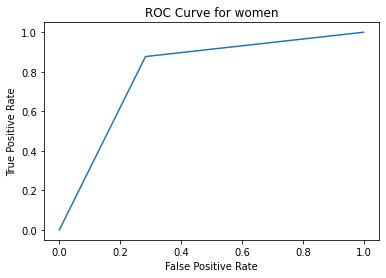

In [19]:
# 8- Plot ROC curve for the "protected group" (sensitive=1)

result = pd.DataFrame({'true': ytest, 'pred': ypred}, index = ytest.index)
ytest_women = ytest.loc[women_test]
ypred_women = result.loc[women_test].pred

roc_auc = roc_auc_score(ytest_women, ypred_women)
print("AUC of ROC Curve:", roc_auc)

fpr_w, tpr_w, thresholds_w = roc_curve(ytest_women, ypred_women)

plt.plot(fpr_w, tpr_w)
plt.title("ROC Curve for women")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AUC of ROC Curve: 0.815040650406504


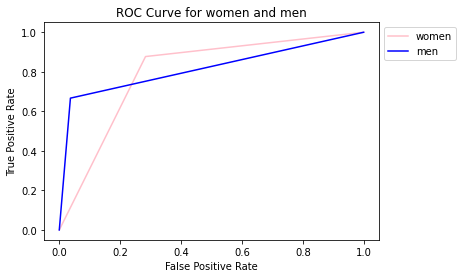

In [20]:
# 9- On the same graph, plot the ROC curve for the "unprotected group" (sensitive=0)
ytest_men = ytest.loc[men_test]
ypred_men = result.loc[men_test].pred

roc_auc = roc_auc_score(ytest_men, ypred_men)
print("AUC of ROC Curve:", roc_auc)

fpr_m, tpr_m, thresholds_m = roc_curve(ytest_men, ypred_men)

plt.plot(fpr_w, tpr_w, c = 'pink', label = 'women')
plt.plot(fpr_m, tpr_m, c ='blue', label = 'men')
plt.title("ROC Curve for women and men")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [21]:
# 10- Find a fair thresholding rule on the prediction of your classifier

print( thresholds_m, thresholds_w)
#What is a fair thresholding?

[2 1 0] [2 1 0]


In [22]:
# 11- Evaluate trade-off between accuracy and fairness
...

Ellipsis